In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import pickle
import matplotlib as mpl
import plotly.graph_objects as go
from scipy import stats

In [2]:
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})
plt.rcParams['axes.linewidth'] = 0.4
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['ytick.minor.width'] = 0.2

Slide_show_width = 4.71512
Paper_width = 6.30045
Format = 1
if Format == 0:
    Image_width = Slide_show_width
if Format == 1:
    Image_width = Paper_width
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

EXTRA_SMALL = 4
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 9

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=EXTRA_SMALL)    # fontsize of the tick labels
plt.rc('ytick', labelsize=EXTRA_SMALL)    # fontsize of the tick labels
plt.rc('legend', fontsize=EXTRA_SMALL)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
def my_rmse(X, Y):
	return np.sqrt(((X - Y) ** 2).mean())
def my_mae(X, Y):
	return np.mean(np.abs(X - Y))

results_dir = 'RESULTS/CLEAN_RESULTS_PAPER/CORR_ANALYSIS/CORR_REJECTION_ANALYSIS'
results_dirs = os.listdir(results_dir)

deliveries = np.unique([int(dir_name.split('_427_')[1].split('_')[0]) for dir_name in results_dirs])

mae_results = {}
for delivery in deliveries:
    try:
        mae_results_delivery = pickle.load(open(f'RESULTS/CORR_ANALYSIS/mae_results_{delivery}.pickle', 'rb'))
        mae_results[delivery] = mae_results_delivery
    except:
        print(f'delivery {delivery} not found')


In [4]:
var_set = 11
ttd = 0
forecast_technique = 'S1_exog_rejected_count'
counter_dict = {}
total_agg = pd.DataFrame()
for exog_idx in range(20):
    exog_agg_list = []
    for delivery in mae_results.keys():
        for horizon in [480,390,300,210,180,150,120,90,60,30]:
            if horizon in mae_results[delivery].keys():
                # choose the trade time
                trade_times = []
                for trad in mae_results[delivery][horizon].keys():
                    if len(mae_results[delivery][horizon][trad]) > 0:
                        trade_times.append(trad)
                trade_time = trade_times[ttd]
                if len(mae_results[delivery][horizon][trade_time]) > 0:
                    if exog_idx in mae_results[delivery][horizon][trade_time][forecast_technique].keys():
                        exog_agg_list.append(mae_results[delivery][horizon][trade_time][forecast_technique][exog_idx]/366)
                        if mae_results[delivery][horizon][trade_time][forecast_technique][exog_idx]/366 > 1:
                            print(mae_results[delivery][horizon][trade_time][forecast_technique][exog_idx], delivery, horizon, trade_time)
    if not np.isnan(np.mean(exog_agg_list)):
        total_agg[exog_idx] = [np.mean(exog_agg_list)]

c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mea

In [5]:
total_agg.loc[:, ].to_csv("exog_correlation_rejections.csv")

In [6]:

var_set = 11
forecast_technique = 'S1_exog_corr_pair'
counter_dict = {}
total_agg = []
for delivery in mae_results.keys():
    for horizon in [480,390,300,210,180,150,120,90,60,30]:
        if horizon in mae_results[delivery].keys():
            # choose the trade time
            trade_times = []
            for trad in mae_results[delivery][horizon].keys():
                if len(mae_results[delivery][horizon][trad]) > 0:
                    trade_times.append(trad)
            trade_time = trade_times[ttd]
            if len(mae_results[delivery][horizon][trade_time]) > 0:
                [total_agg.append((i[0], i[1])) for i in mae_results[delivery][horizon][trade_time][forecast_technique]]



2 is the T - 6 price at the moment we forecast -> some anomaly
11 is the DA qtrhrly price
12 is actual load and 9 is the load forecast
14 is actual RES and 10 is RES forecast 
17 is sum of volue traded in last 60min and 18 it the no of minutes with trades in them

In [7]:
np.unique(total_agg, axis=0)


array([[   2,  273],
       [   2,  399],
       [   2,  401],
       [   2,  417],
       [   2,  449],
       [   2,  587],
       [   2,  863],
       [   2,  988],
       [   2, 1034],
       [  11,    0],
       [  11,    2],
       [  11,    3],
       [  11,    4],
       [  11,    5],
       [  11,    6],
       [  11,    7],
       [  11,    8],
       [  11,    9],
       [  11,   10],
       [  11,   11],
       [  11,   12],
       [  11,   14],
       [  11,   15],
       [  11,   16],
       [  11,   17],
       [  11,   18],
       [  11,   19],
       [  11,   20],
       [  11,   21],
       [  11,   22],
       [  11,   24],
       [  11,   25],
       [  11,   26],
       [  11,   27],
       [  11,   28],
       [  11,   29],
       [  11,   30],
       [  11,   32],
       [  11,   33],
       [  11,   34],
       [  11,   35],
       [  11,   36],
       [  11,   38],
       [  11,   39],
       [  11,   40],
       [  11,   42],
       [  11,   44],
       [  11,

In [8]:
ttd_titles = ['1h']

ttd = 0

labels_map = {'S1_perc': 'perc. of rejections S_1',
            'S2_perc':  'perc. of rejections S_2',
            'S1_exog_rejected': 'mode of rejected exog S_1',
            }
fig = go.Figure()
for var_set in [11]:

    for forecast_technique in [i for i in mae_results[0][30][list(mae_results[0][30].keys())[0]].keys() if i != 'naive' and '_DM_' not in i]:
        if 'exog' in forecast_technique:
            continue
        results = {}
        counter_dict = {}
        for delivery in mae_results.keys():
            for horizon in [480,390,300,210,180,150,120,90,60,30]:
                if horizon in mae_results[delivery].keys():
                    if not (horizon in results.keys()):
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in mae_results[delivery][horizon].keys():
                        if len(mae_results[delivery][horizon][trad]) > 0:
                            trade_times.append(trad)
                    trade_time = trade_times[ttd]
                    if len(mae_results[delivery][horizon][trade_time]) > 0:
                        results[horizon] += mae_results[delivery][horizon][trade_time][forecast_technique]
                        print(forecast_technique, mae_results[delivery][horizon][trade_time][forecast_technique])
                        counter_dict[horizon] += 1
        results_plot = []
        for horizon in [480,390,300,210,180,150,120,90,60,30]:
            if horizon == 30 and counter_dict[horizon] != 96:
                print(delivery)

            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            results_plot.append(results[horizon]/counter_dict[horizon])

        try:
            fig.add_trace(go.Scatter(x=[480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                                        y=np.array(results_plot),
                                        mode='lines',
                                        name=labels_map[forecast_technique]))
        except:
            continue

fig.add_trace(go.Scatter(x=[480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                         y=[0]*10,
                         mode='lines',
                         name='Zero line',
                         line=dict(dash='dash')))
fig.update_layout(title=f"Average relative error over all deliveries",
                  xaxis_title="Forecast Horizon",
                  yaxis_title="Relative Error",
                  legend_title="Forecast Technique")
fig.write_html("../Paper_Figures/avg_corr_rejections_plotly.html", include_plotlyjs='cdn')

S1_perc 0.22437444103340154
S1_perc 0.312313903414669
S1_perc 0.35778125994310456
S1_perc 0.29382524722904363
S1_perc 0.16029645618695867
S1_perc 0.07249544626593807
S1_perc 0.2661797276039079
S1_perc 0.40327865106071475
S1_perc 0.42772911576669803
S1_perc 0.31625731355289427
S1_perc 0.1669542024460057
S1_perc 0.060525789684126356
S1_perc 0.33604929072142187
S1_perc 0.4778949172224353
S1_perc 0.4433627394729756
S1_perc 0.34806007749608153
S1_perc 0.1840733534054729
S1_perc 0.06932884965671851
S1_perc 0.16794858269966756
S1_perc 0.40288238094067563
S1_perc 0.5030886243386243
S1_perc 0.4807669637131674
S1_perc 0.3671696111484928
S1_perc 0.19090833054533288
S1_perc 0.06915684018790143
S1_perc 0.2507472569225817
S1_perc 0.46116725731219826
S1_perc 0.4872690226724172
S1_perc 0.508039278190521
S1_perc 0.3729879126720999
S1_perc 0.20103644356083827
S1_perc 0.08046709566908988
S1_perc 0.32206824747808355
S1_perc 0.5275591271781436
S1_perc 0.5268077947042511
S1_perc 0.5160013793419052
S1_perc 0

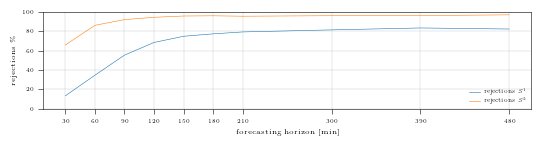

In [10]:
import matplotlib.pyplot as plt
import numpy as np

ttd_titles = ['1h']
ttd = 0

labels_map = {'S1_perc': r'rejections $S^1$',
              'S2_perc': r'rejections $S^2$',
              'S1_exog_rejected': 'mode of rejected exog S_1'}

fig, ax = plt.subplots(figsize=(Paper_width, 0.2*Paper_width))

for var_set in [11]:
    for forecast_technique in [i for i in mae_results[0][30][list(mae_results[0][30].keys())[0]].keys() if i != 'naive' and '_DM_' not in i]:
        if 'exog' in forecast_technique:
            continue
        results = {}
        counter_dict = {}
        for delivery in mae_results.keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
                if horizon in mae_results[delivery].keys():
                    if horizon not in results:
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in mae_results[delivery][horizon].keys():
                        if len(mae_results[delivery][horizon][trad]) > 0:
                            trade_times.append(trad)
                    trade_time = trade_times[ttd]
                    if len(mae_results[delivery][horizon][trade_time]) > 0:
                        results[horizon] += mae_results[delivery][horizon][trade_time][forecast_technique]
                        counter_dict[horizon] += 1
        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
            if horizon == 30 and counter_dict[horizon] != 96:
                print(delivery)

            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        try:
            ax.plot([480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                    np.array(results_plot)*100,
                    label=labels_map[forecast_technique], lw=0.4)
        except:
            continue

# Customize the plot
ax.set_title("")
ax.set_xlabel("forecasting horizon [min]")
ax.set_ylabel("rejections \%")
ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30])
ax.legend(frameon=False)
ax.grid(visible=True, linewidth=0.2)
ax.set_ylim((0, 100))
# Save the plot as an HTML file (requires mpld3 library)
plt.savefig("../Paper_Figures/corr_filter_rejection_of_variables_over_the_horizon.pdf", bbox_inches = 'tight')


In [11]:
mae_results[delivery][horizon][trade_time]

{'S1_perc': 0.11289051846913731,
 'S2_perc': 0.5957490636704121,
 'S1_exog_rejected': 12,
 'S1_exog_rejected_count': {12: 366, 14: 366},
 'S1_exog_corr_pair': array([[12,  9],
        [14, 10]], dtype=int64),
 'S2_exog_corr_pair': array([[  1, 280],
        [  3,   2],
        [  4,   3],
        [  6,   5],
        [  7,   6],
        [  9,   8],
        [ 10,   8],
        [ 10,   9],
        [ 11,  10],
        [ 12,  10],
        [ 13,  11],
        [ 17,  16],
        [ 19,  18]], dtype=int64)}

In [12]:
results_matrix = pd.DataFrame()
col_chosen = 'S1_perc'

for d, delivery in enumerate(mae_results.keys()):
    for h, horizon in enumerate([480,420,360,300,240,180,150,120,90,60,30]):
        if horizon in mae_results[delivery].keys():
            # choose the trade time
            trade_times = []
            for trad in mae_results[delivery][horizon].keys():
                if len(mae_results[delivery][horizon][trad]) > 0:
                    trade_times.append(trad)
            trade_time = trade_times[0]
            if len(mae_results[delivery][horizon][trade_time]) > 0 and 'naive' in mae_results[delivery][horizon][trade_time].keys() and mae_results[delivery][horizon][trade_time]['naive']:
                results_matrix.loc[horizon, delivery * 0.25] = mae_results[delivery][horizon][trade_time][col_chosen]
results_matrix = results_matrix.sort_index()

C:\Users\riczi\AppData\Local\Temp\ipykernel_16912\2675648644.py:14: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.

C:\Users\riczi\AppData\Local\Temp\ipykernel_16912\2675648644.py:14: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



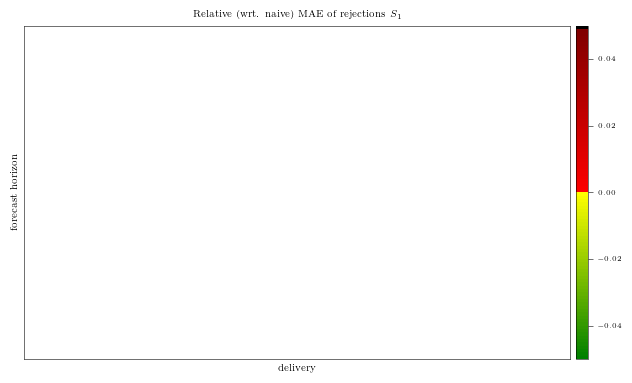

In [13]:
import matplotlib as mpl
import matplotlib.ticker as mtick

results_matrix = results_matrix.sort_index()

red = np.concatenate([np.linspace(0, 1, 50), np.linspace(1, 0.5, 50)[1:], [0]])
green = np.concatenate([np.linspace(0.5, 1, 50), np.zeros(50)])
blue = np.zeros(100)
rgb_color_map = np.concatenate([red.reshape(-1, 1), green.reshape(-1, 1),
                                blue.reshape(-1, 1)], axis=1)
rgb_color_map = mpl.colors.ListedColormap(rgb_color_map)

fig, ax = plt.subplots(figsize=(Image_width, 0.6*Image_width))
im = ax.imshow(results_matrix.astype(float).values, cmap=rgb_color_map, vmin=-0.05, vmax=0.05, aspect='auto')
ax.set_xticks(range(len(results_matrix.columns)), results_matrix.columns, rotation=90.)
ax.set_yticks(range(len(results_matrix.index)), results_matrix.index)
ax.set_xlabel("delivery")
ax.set_ylabel("forecast horizon")
ax.set_title(f"Relative (wrt. naive) MAE of {labels_map[col_chosen]}")
ax.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax.grid(True)
plt.tight_layout()
fig.subplots_adjust(right=0.9)
ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1+0.01, ax_pos.y0, 0.02, ax_pos.y1-ax_pos.y0])
fig.colorbar(im, cax=cbar_ax, pad=0.5, shrink=0.4)

# Loop over data dimensions and create text annotations.
# for i_idx, i in enumerate(results_matrix.index):
#     for j_idx, j in enumerate(results_matrix.columns):
#         text = ax.text(j_idx, i_idx, results_matrix.loc[i, j].round(2),
#                        ha="center", va="center", color="w")
plt.savefig("../Paper_Figures/3D_corr_perc_rejected_S1.pdf")

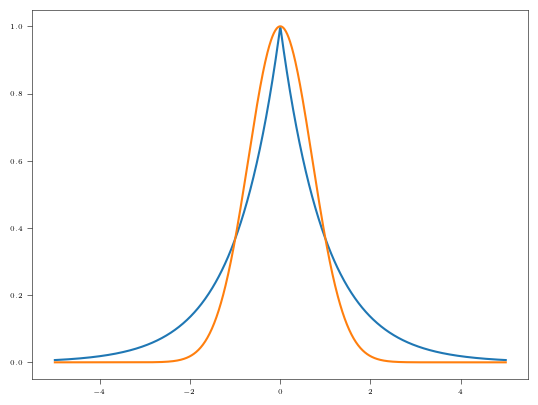

In [14]:
T = np.linspace(-5, 5, 1000)
func = np.exp(-np.abs(T))
plt.plot(T, func)
func = np.exp(-(T)**2)
plt.plot(T, func)